<a href="https://colab.research.google.com/github/Beatriz-Paes/Projeto-P-D-UEA-IA/blob/main/projeto_uea_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pydot
import graphviz
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

from ipywidgets import interactive
from IPython.display import SVG, display
from graphviz import Source

### Importação e Leitura dos dados

In [29]:
uri = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(uri, names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Class"])

iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Breve análise para compreender o conjunto de dados

In [30]:
print("INFORMAÇÕES DO DATASET:")
iris.info()

print("___________________________________________________________________")
print()

print("DESCRIÇÃO DO DATASET:")
iris.describe()

INFORMAÇÕES DO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Class          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
___________________________________________________________________

DESCRIÇÃO DO DATASET:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
print("DISTRIBUIÇÃO DAS ESPÉCIES DE IRIS:")
iris.groupby('Class').size()

DISTRIBUIÇÃO DAS ESPÉCIES DE IRIS:


Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Análise visual dos dados

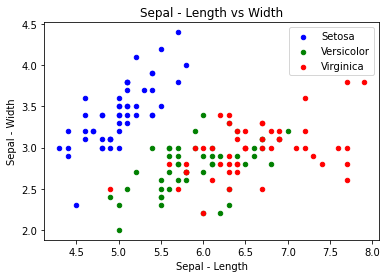

In [32]:
fig = iris[iris.Class == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color="blue", label="Setosa")
iris[iris.Class == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Versicolor', ax=fig)
iris[iris.Class == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='red', label='Virginica', ax=fig)

fig.set_xlabel('Sepal - Length')
fig.set_ylabel('Sepal - Width')
fig.set_title('Sepal - Length vs Width')

plt.show()

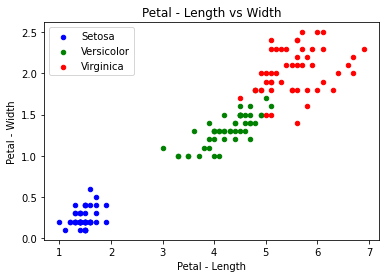

In [33]:
fig = iris[iris.Class == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color="blue", label="Setosa")
iris[iris.Class == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Versicolor', ax=fig)
iris[iris.Class == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='red', label='Virginica', ax=fig)

fig.set_xlabel('Petal - Length')
fig.set_ylabel('Petal - Width')
fig.set_title('Petal - Length vs Width')

plt.show()

## Classificador - Modelo 1 - Todo o Conjunto de dados

### Separando os dados e aplicando o algoritmo (DecisionTreeClassifier)

In [34]:
# Separação dos dados, onde x são as características e y o nosso alvo, neste caso a coluna Class
x = np.array(iris.drop(['Class'], 1))
y = np.array(iris['Class'])

# Separação dos dados de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(f'São {x_train.shape[0]} dados para treinamento e {y_test.shape[0]} dados para teste.')

São 120 dados para treinamento e 30 dados para teste.


In [35]:
# Aplicando o algoritmo de aprendizagem de máquina, instanciando, treinando e fazendo uma previsão
algoritmo = DecisionTreeClassifier()
algoritmo = algoritmo.fit(x_train, y_train)
y_pred = algoritmo.predict(x_test)

print(y_pred)

['Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa']


### Análisando a performance do algoritmo

In [36]:
# Calculando a precisão do algoritmo
print(f'Precisão do modelo: {algoritmo.score(x_train, y_train) * 100}')

Precisão do modelo: 100.0


In [37]:
# Importância de cada característica para o modelo treinado
for feature, importance in zip(iris.columns, algoritmo.feature_importances_):
  print(f'{feature}: {importance}')

SepalLengthCm: 0.0
SepalWidthCm: 0.01875390706397166
PetalLengthCm: 0.5825299672521005
PetalWidthCm: 0.3987161256839277


In [38]:
# Algumas métricas
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



### Renderizando a árvore graficamente

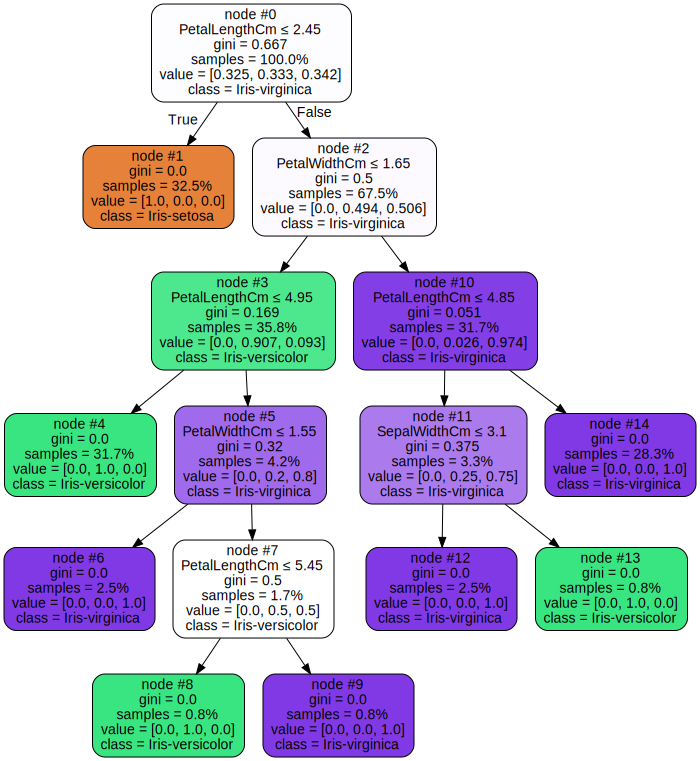

In [39]:
# Renderizando a árvore de forma gráfica (Sem parâmetros)
dot_data = export_graphviz(algoritmo, out_file=None, feature_names=iris.drop(
    'Class', axis=1).columns,
    class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    filled=True, rounded=True, proportion=True, node_ids=True, rotate=False,
    label='all', special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [40]:
# Renderizando a árvore de forma gráfica (Com parâmetros)

x, y = iris.drop('Class', axis=1), iris['Class']

features_label = iris.drop('Class', axis=1).columns

class_label = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
        random_state=0,
        criterion=crit,
        splitter=split,
        max_depth=depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )
    estimator.fit(x, y)
    graph = Source(export_graphviz(
        estimator,
        out_file=None,
        feature_names=features_label,
        class_names=class_label,
        impurity=True,
        filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(
    plot_tree,
    crit = ["gini", "entropy"],
    split = ["best", "random"],
    depth=[1, 2, 3, 4, 5, 6, 7, 8, 10],
    min_samples_split=(1, 5),
    min_samples_leaf=(1, 5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### Navegando na estrutura da arvore de decisão

In [41]:
estimator = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=2)
estimator.fit(x, y)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

print("Número de nós: {}".format(n_nodes))

Número de nós: 9


In [42]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("\nA arvore binária tem %s nós e a seguinte estrutura: \n"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snó = %s (nó folha)." % (node_depth[i] * "\t", i))
    else:
        print("%snó = %s (nó teste): vai para o nó %s se o valor do atributo %s <= %s \n se não, vai para o "
              "nó %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 iris.columns[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))


A arvore binária tem 9 nós e a seguinte estrutura: 

nó = 0 (nó teste): vai para o nó 1 se o valor do atributo PetalWidthCm <= 0.800000011920929 
 se não, vai para o nó 2.
	nó = 1 (nó folha).
	nó = 2 (nó teste): vai para o nó 3 se o valor do atributo PetalWidthCm <= 1.75 
 se não, vai para o nó 6.
		nó = 3 (nó teste): vai para o nó 4 se o valor do atributo PetalLengthCm <= 4.950000047683716 
 se não, vai para o nó 5.
			nó = 4 (nó folha).
			nó = 5 (nó folha).
		nó = 6 (nó teste): vai para o nó 7 se o valor do atributo PetalLengthCm <= 4.8500001430511475 
 se não, vai para o nó 8.
			nó = 7 (nó folha).
			nó = 8 (nó folha).


## Classificador - Modelo 2 - Dados correspondentes às sépalas

### Preparação dos dados

In [43]:
# Definição de dados
sepal = iris[['SepalLengthCm', 'SepalWidthCm', 'Class']]

# Separação dos dados, onde x_sepal são as características e y_sepal o nosso alvo, neste caso a coluna Class
x_sepal = np.array(sepal.drop(['Class'], 1))
y_sepal = np.array(sepal['Class'])

# Separação dos dados de treinamento e teste
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_sepal, y_sepal, test_size=0.2)

print(f'São {x_train_s.shape[0]} dados das sépalas para treinamento e {y_test_s.shape[0]} dados para teste.')

São 120 dados das sépalas para treinamento e 30 dados para teste.


### Aplicando o algoritmo

In [44]:
# Aplicando o algoritmo de aprendizagem de máquina, instanciando, treinando e fazendo uma previsão
algoritmo = DecisionTreeClassifier()
algoritmo = algoritmo.fit(x_train_s, y_train_s)
y_pred = algoritmo.predict(x_test_s)

print(y_pred)
print()

# Calculando a precisão do algoritmo
print(f'Precisão do modelo: {algoritmo.score(x_train_s, y_train_s) * 100}')

['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica']

Precisão do modelo: 94.16666666666667


## Classificador - Modelo 3 - Dados correspondentes às pétalas

### Preparação dos dados

In [45]:
# Definição de dados
petal = iris[['PetalLengthCm', 'PetalWidthCm', 'Class']]

# Separação dos dados, onde x_petal são as características e y_petal o nosso alvo, neste caso a coluna Class
x_petal = np.array(petal.drop(['Class'], 1))
y_petal = np.array(petal['Class'])

# Separação dos dados de treinamento e teste
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_petal, y_petal, test_size=0.2)

print(f'São {x_train_p.shape[0]} dados das pétalas para treinamento e {y_test_p.shape[0]} dados para teste.')

São 120 dados das pétalas para treinamento e 30 dados para teste.


### Aplicando o algoritmo

In [47]:
# Aplicando o algoritmo de aprendizagem de máquina, instanciando, treinando e fazendo uma previsão
algoritmo = DecisionTreeClassifier()
algoritmo = algoritmo.fit(x_train_p, y_train_p)
y_pred = algoritmo.predict(x_test_p)

print(y_pred)
print()

# Calculando a precisão do algoritmo
print(f'Precisão do modelo: {algoritmo.score(x_train_p, y_train_p) * 100}')

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']

Precisão do modelo: 99.16666666666667


# Relatório

In [48]:
# Código usado para gerar relatório:
  
  #01 %cd caminho_do_arquivo_no_drive
  #02 !sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
  #03 !jupyter nbconvert --no-input fileName.ipynb

  #04 alguns ajustes finais no html


!jupyter nbconvert --no-input projeto_uea_ia.ipynb

[NbConvertApp] Converting notebook projeto_uea_ia.ipynb to html
[NbConvertApp] Writing 368001 bytes to projeto_uea_ia.html
